In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
from pprint import pprint
import pandas as pd
import os
import json
import numpy as np
import pandas
from tslearn.piecewise import PiecewiseAggregateApproximation

/home/bruna/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
hits = pd.read_csv(r"dataset/spotify_hits_dataset_complete.csv", error_bad_lines=False, sep='\t', encoding='utf-8')
hits.head()

/home/bruna/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,7offICpl9kla5kC61uUAs9,Bate Palma,"['5GqnSMX8p2hxqsM6LqDty3', '0jTDeBJQr3unrK29Lk...","['MC JottaPê', 'Lexa']",50,False,Collaboration,1,2,181,...,4,0.626,0.857,0.685,0.0,0.206,-4.840,0.3800,0.8370,150.052
1,1dLXLETYiZohIZWnse4ypG,Better,['5ZsFI1h6hIdQRw2ti0hz81'],['ZAYN'],68,False,Solo,1,1,183,...,4,0.353,0.637,0.418,0.0,0.131,-7.137,0.3010,0.0807,84.295
2,79Uf0vVa7HwWKSgdpTwtRm,Século 21,"['7KVJCU4z5L4EUHILL8aMxR', '4PzYKhC14sTJNEr0dz...","['Leo Santana', 'Luísa Sonza']",50,True,Collaboration,5,2,184,...,4,0.456,0.832,0.769,0.0,0.407,-7.023,0.0578,0.7240,132.972
3,3U4isOIWM3VvDubwSI3y7a,All of Me,['5y2Xq6xcjJb2jVM54GHK3t'],['John Legend'],88,False,Solo,6,1,184,...,4,0.922,0.422,0.264,0.0,0.132,-7.064,0.0322,0.3310,119.930
4,78kar2tZk7655xZMibzXO3,Oi,['5D56dZmhE9DgT01XixdHiD'],['Lagum'],63,False,Solo,4,1,184,...,4,0.296,0.807,0.560,0.0,0.101,-9.356,0.0459,0.7250,134.093


In [3]:
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join('segundo_2020', x)),
                        os.listdir('segundo_2020') ))

In [4]:
danceability_medias = []
valence_medias = []
energy_medias = []
tempo_medias = []
dates = []
danceability_median = []
valence_median = []
energy_median = []
tempo_median = []

In [6]:
directory = 'segundo_2020'
for filename in list_of_files:
    if filename.endswith(".csv"):
        danceability_week = []
        valence_week = []
        energy_week = []
        tempo_week = []
        path = directory + '/' + filename
        chart = pd.read_csv(path, encoding='utf-8', delimiter='\t')
        for i in chart['ID']:
            for idx, song_id in enumerate(hits['song_id']):
                if i == song_id:
                    danceability_week.append(hits.loc[idx, 'danceability'])
                    valence_week.append(hits.loc[idx, 'valence'])
                    energy_week.append(hits.loc[idx, 'energy'])
                    tempo_week.append(hits.loc[idx, 'tempo'])
                    ates = pd.to_datetime(dates)
        dates.append(filename[18:28])
        
        danceability_medias.append(np.mean(danceability_week))
        valence_medias.append(np.mean(valence_week))
        energy_medias.append(np.mean(energy_week))
        tempo_medias.append(np.mean(tempo_week))
        
        danceability_median.append(np.median(danceability_week))
        valence_median.append(np.median(valence_week))
        energy_median.append(np.median(energy_week))
        tempo_median.append(np.median(tempo_week))

In [7]:
dates = pd.to_datetime(dates)

In [8]:
df = pd.DataFrame(list(zip(dates, danceability_medias, danceability_median, valence_medias, valence_median, energy_medias, energy_median, tempo_medias, tempo_median)), 
                     columns=['Data', 'DanceabilityMedia', 'DanceabilityMedian','ValenceMedia', 'ValenceMedian', 'EnergyMedia', 'EnergyMedian', 'TempoMedia', 'TempoMedian'])
df.head(20)

,Data,DanceabilityMedia,DanceabilityMedian,ValenceMedia,ValenceMedian,EnergyMedia,EnergyMedian,TempoMedia,TempoMedian
0,2020-06-01,0.677026,0.6920,0.592578,0.5980,0.692097,0.7200,125.197995,124.9000
1,2020-06-02,0.674974,0.6910,0.587371,0.5810,0.688466,0.7200,124.712293,123.9500
2,2020-06-03,0.677597,0.6915,0.592744,0.5930,0.691816,0.7220,125.064036,124.0280
3,2020-06-04,0.676412,0.6830,0.596940,0.6030,0.695171,0.7230,125.779166,124.9490
4,2020-06-05,0.677437,0.6800,0.611151,0.6280,0.705372,0.7290,126.538965,125.0700
5,2020-06-06,0.682565,0.6915,0.640047,0.6580,0.710105,0.7295,128.384170,128.5505
6,2020-06-07,0.680460,0.6910,0.639292,0.6580,0.713110,0.7300,129.471230,129.9910
7,2020-06-08,0.681170,0.6935,0.605934,0.6085,0.687935,0.7155,126.335250,126.0130
8,2020-06-09,0.682125,0.6935,0.608303,0.6200,0.687000,0.7145,126.590850,126.0130
9,2020-06-10,0.684320,0.6950,0.613488,0.6280,0.691970,0.7180,126.497690,125.9940


In [12]:
for idx, x in enumerate(dates):
    print(idx, x)

0 2020-06-01 00:00:00
1 2020-06-02 00:00:00
2 2020-06-03 00:00:00
3 2020-06-04 00:00:00
4 2020-06-05 00:00:00
5 2020-06-06 00:00:00
6 2020-06-07 00:00:00
7 2020-06-08 00:00:00
8 2020-06-09 00:00:00
9 2020-06-10 00:00:00
10 2020-06-11 00:00:00
11 2020-06-12 00:00:00
12 2020-06-13 00:00:00
13 2020-06-14 00:00:00
14 2020-06-15 00:00:00
15 2020-06-16 00:00:00
16 2020-06-17 00:00:00
17 2020-06-18 00:00:00
18 2020-06-19 00:00:00
19 2020-06-20 00:00:00
20 2020-06-21 00:00:00
21 2020-06-22 00:00:00
22 2020-06-23 00:00:00
23 2020-06-24 00:00:00
24 2020-06-25 00:00:00
25 2020-06-26 00:00:00
26 2020-06-28 00:00:00
27 2020-06-29 00:00:00
28 2020-06-30 00:00:00
29 2020-07-01 00:00:00
30 2020-07-02 00:00:00
31 2020-07-03 00:00:00
32 2020-07-04 00:00:00
33 2020-07-05 00:00:00
34 2020-07-06 00:00:00
35 2020-07-07 00:00:00
36 2020-07-08 00:00:00
37 2020-07-09 00:00:00
38 2020-07-10 00:00:00
39 2020-07-11 00:00:00
40 2020-07-12 00:00:00
41 2020-07-13 00:00:00
42 2020-07-14 00:00:00
43 2020-07-15 00:00:0

## Danceability

Text(0, 0.5, 'Danceability')

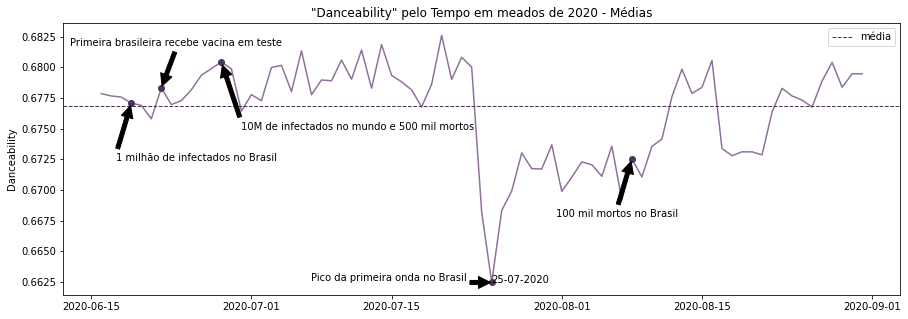

In [53]:
media = np.mean(danceability_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], danceability_medias[15:], color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

ax.text(dates[53], danceability_medias[53], "25-07-2020", ha='left', **style)

ax.plot(dates[18], danceability_medias[18], 'o', color='#4F335B')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], danceability_medias[18]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], danceability_medias[21], 'o', color='#4F335B')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], danceability_medias[21]), xycoords='data',
            xytext=(15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[26], danceability_medias[26], 'o', color='#4F335B')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], danceability_medias[26]), xycoords='data',
            xytext=(20, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], danceability_medias[53], 'o', color='#4F335B')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], danceability_medias[53]), xycoords='data',
            xytext=(-25, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], danceability_medias[67], 'o', color='#4F335B')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], danceability_medias[67]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Danceability" pelo Tempo em meados de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

Text(0, 0.5, 'Danceability')

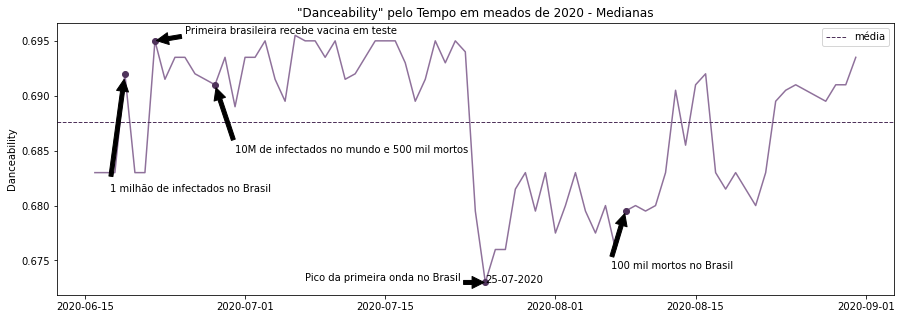

In [55]:
media = np.mean(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], danceability_median[15:], color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

ax.text(dates[53], danceability_median[53], "25-07-2020", ha='left', **style)

ax.plot(dates[18], danceability_median[18], 'o', color='#4F335B')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], danceability_median[18]), xycoords='data',
            xytext=(-15, -110), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], danceability_median[21], 'o', color='#4F335B')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], danceability_median[21]), xycoords='data',
            xytext=(30, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], danceability_median[26], 'o', color='#4F335B')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], danceability_median[26]), xycoords='data',
            xytext=(20, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], danceability_median[53], 'o', color='#4F335B')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], danceability_median[53]), xycoords='data',
            xytext=(-25, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], danceability_median[67], 'o', color='#4F335B')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], danceability_median[67]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

plt.title('"Danceability" pelo Tempo em meados de 2020 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

# Valence

Text(0, 0.5, 'Valence')

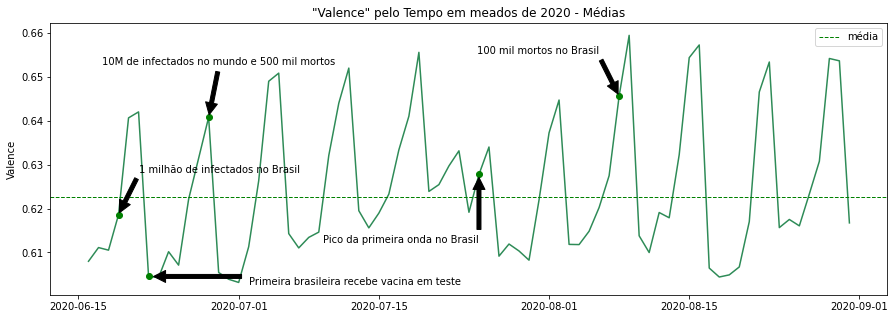

In [51]:
media = np.mean(valence_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], valence_medias[15:], color='#2E8B57')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[18], valence_medias[18], 'o', color='g')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], valence_medias[18]), xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], valence_medias[21], 'o', color='g')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], valence_medias[21]), xycoords='data',
            xytext=(100, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], valence_medias[26], 'o', color='g')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], valence_medias[26]), xycoords='data',
            xytext=(10, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], valence_medias[53], 'o', color='g')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], valence_medias[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], valence_medias[67], 'o', color='g')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], valence_medias[67]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Valence" pelo Tempo em meados de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

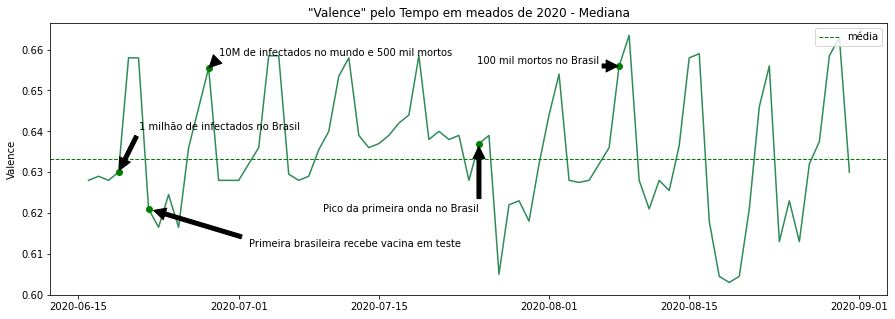

In [63]:
media = np.mean(valence_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], valence_median[15:], color='#2E8B57')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[18], valence_median[18], 'o', color='g')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], valence_median[18]), xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], valence_median[21], 'o', color='g')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], valence_median[21]), xycoords='data',
            xytext=(100, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], valence_median[26], 'o', color='g')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], valence_median[26]), xycoords='data',
            xytext=(10, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], valence_median[53], 'o', color='g')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], valence_median[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], valence_median[67], 'o', color='g')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], valence_median[67]), xycoords='data',
            xytext=(-20, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Valence" pelo Tempo em meados de 2020 - Mediana')
plt.legend(loc="upper right")
plt.ylabel('Valence')

# Energy

Text(0, 0.5, 'Energy')

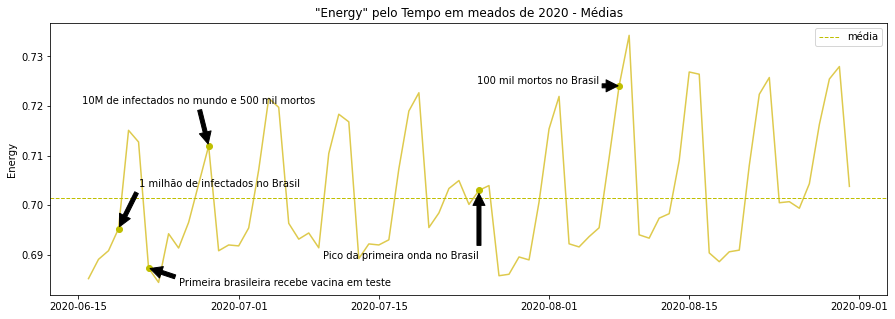

In [70]:
media = np.mean(energy_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], energy_medias[15:], color='#DECA4D')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[18], energy_medias[18], 'o', color='y')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], energy_medias[18]), xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], energy_medias[21], 'o', color='y')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], energy_medias[21]), xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], energy_medias[26], 'o', color='y')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], energy_medias[26]), xycoords='data',
            xytext=(-10, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], energy_medias[53], 'o', color='y')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], energy_medias[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], energy_medias[67], 'o', color='y')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], energy_medias[67]), xycoords='data',
            xytext=(-20, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Energy" pelo Tempo em meados de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

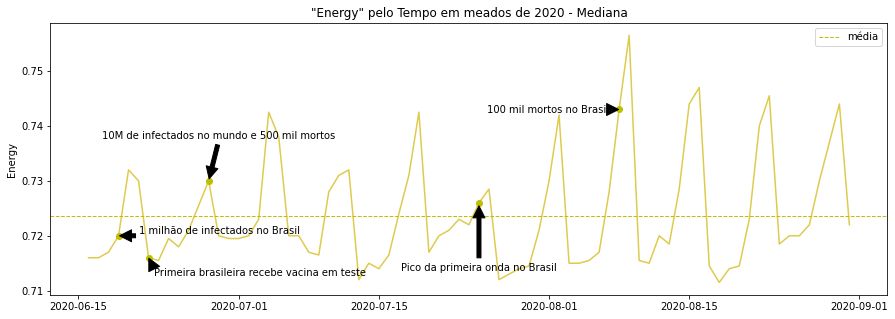

In [78]:
media = np.mean(energy_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], energy_median[15:], color='#DECA4D')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[18], energy_median[18], 'o', color='y')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], energy_median[18]), xycoords='data',
            xytext=(20, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], energy_median[21], 'o', color='y')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], energy_median[21]), xycoords='data',
            xytext=(5, -10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], energy_median[26], 'o', color='y')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], energy_median[26]), xycoords='data',
            xytext=(10, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], energy_median[53], 'o', color='y')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], energy_median[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[67], energy_median[67], 'o', color='y')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], energy_median[67]), xycoords='data',
            xytext=(-10, 5), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Energy" pelo Tempo em meados de 2020 - Mediana')
plt.legend(loc="upper right")
plt.ylabel('Energy')

# Tempo

Text(0, 0.5, 'Tempo')

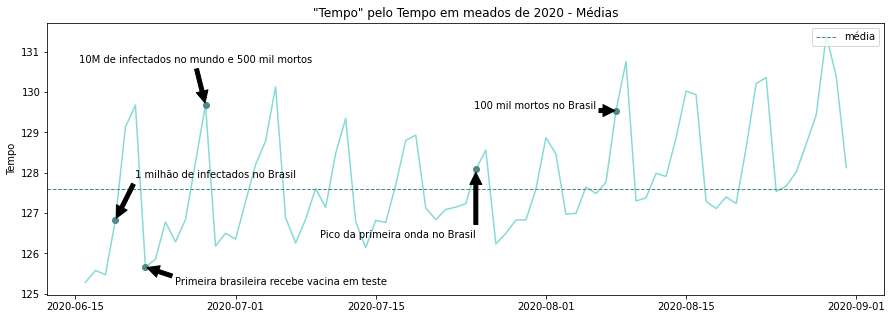

In [83]:
media = np.mean(tempo_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], tempo_medias[15:], color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[18], tempo_medias[18], 'o', color='#518986')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], tempo_medias[18]), xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], tempo_medias[21], 'o', color='#518986')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], tempo_medias[21]), xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], tempo_medias[26], 'o', color='#518986')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], tempo_medias[26]), xycoords='data',
            xytext=(-10, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], tempo_medias[53], 'o', color='#518986')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], tempo_medias[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], tempo_medias[67], 'o', color='#518986')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], tempo_medias[67]), xycoords='data',
            xytext=(-20, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em meados de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

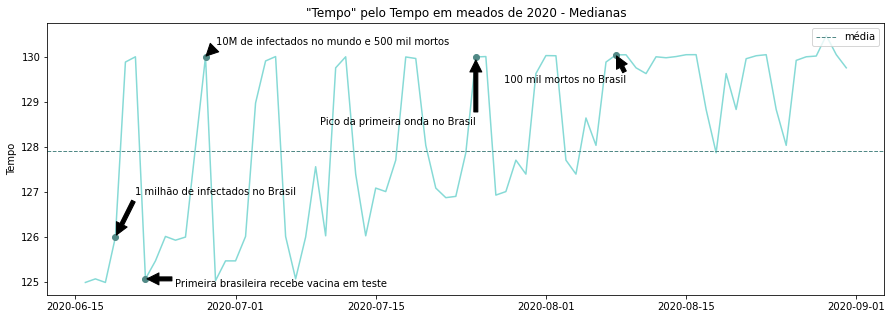

In [86]:
media = np.mean(tempo_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:], tempo_median[15:], color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[18], tempo_median[18], 'o', color='#518986')
ax.annotate('1 milhão de infectados no Brasil',
            xy=(dates[18], tempo_median[18]), xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[21], tempo_median[21], 'o', color='#518986')
ax.annotate('Primeira brasileira recebe vacina em teste',
            xy=(dates[21], tempo_median[21]), xycoords='data',
            xytext=(30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], tempo_median[26], 'o', color='#518986')
ax.annotate('10M de infectados no mundo e 500 mil mortos',
            xy=(dates[26], tempo_median[26]), xycoords='data',
            xytext=(10, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], tempo_median[53], 'o', color='#518986')
ax.annotate('Pico da primeira onda no Brasil',
            xy=(dates[53], tempo_median[53]), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[67], tempo_median[67], 'o', color='#518986')
ax.annotate('100 mil mortos no Brasil',
            xy=(dates[67], tempo_median[67]), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em meados de 2020 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Tempo')